### Setup

In [1]:
!pip install --no-deps -q bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 MB 13.6 MB/s eta 0:00:00


In [2]:
!pip install addict transformers==4.46.3 tokenizers==0.20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 53.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.4.1
    Uninstalling huggingface_hub-1.4.1:
      Successfully uninstalled huggingface_hub-1.4.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.2
    Uninstalling tokenizers-0.22.2:
      Successfully uninstalled tokenizers-0.22.2
  Attempting uninstall: transformers
    Found existing installation: transformers 5.0.0
    Uninstalling transformers-5.0.0:
      Successfully uninstalled transformers-5.0.0


### OCR

In [1]:
from transformers import AutoModel, AutoTokenizer, BitsAndBytesConfig
import torch

model_name = 'deepseek-ai/DeepSeek-OCR'

In [2]:
qc = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float
)

In [3]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(
    model_name, trust_remote_code=True,
    use_safetensors=True, device_map="auto",
    quantization_config=qc,
    torch_dtype=torch.float
)
model = model.eval()

You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
prompt = "<image>\n<|grounding|>OCR this image."
# Prompts examples:
# document: <image>\n<|grounding|>Convert the document to markdown.
# other image: <image>\n<|grounding|>OCR this image.
# without layouts: <image>\nFree OCR.
# figures in document: <image>\nParse the figure.
# general: <image>\nDescribe this image in detail.
# rec: <image>\nLocate <|ref|>xxxx<|/ref|> in the image.

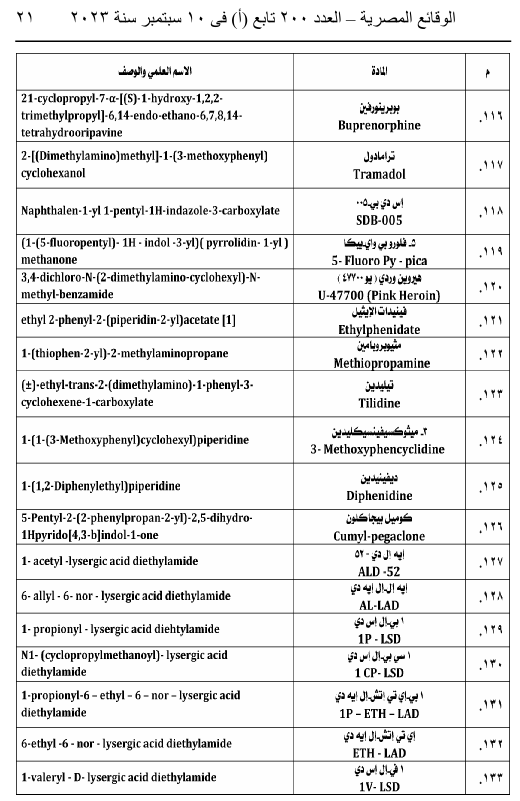

In [5]:
image_file = "/content/Screenshot 2026-02-26 230152.png"
from IPython.display import Image
Image(image_file, width=640)

In [17]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
with torch.no_grad():
    res = model.infer(
        tokenizer,
        prompt=prompt,
        image_file=image_file,
        output_path=".",
        base_size=1024,
        image_size=1024,
        crop_mode=False,
        save_results=True,
        test_compress=True,
        eval_mode=False
    )

/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Cal

BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|>21<|/ref|><|det|>[[20, 7, 52, 26]]<|/det|>
<|ref|>21<|/ref|><|det|>[[0, 0, 25, 19]]<|/det|>
<|ref|>2023<|/ref|><|det|>[[110, 0, 201, 20]]<|/det|>
<|ref|>سبتمرب سنة10فى1)تابع(أ)20العدد200المواضعالمصرية<|/ref|><|det|>[[193, 0, 870, 24]]<|/det|>
<|ref|>م<|/ref|><|det|>[[884, 72, 911, 95]]<|/det|>
<|ref|>االسم العلمي والوسط<|/ref|><|det|>[[180, 80, 333, 99]]<|/det|>
<|ref|>21-cyclopropyl-7-a-[(S)-1-hydroxy-1,2,2-<|/ref|><|det|>[[42, 110, 408, 130]]<|/det|>
<|ref|>Buprenorphine<|/ref|><|det|>[[625, 130, 777, 151]]<|/det|>
<|ref|>1216<|/ref|><|det|>[[884, 120, 937, 140]]<|/det|>
<|ref|>tetrahydropropiabine<|/ref|><|det|>[[42, 144, 240, 162]]<|/det|>
<|ref|>2-[[Dimethylamino)methyl]-1-(3-methoxyphenyl]<|/ref|><|det|>[[42, 175, 500, 197]]<|/det|>
<|ref|>cyclohexanol<|/ref|><|det|>[[42, 199, 170, 217]]<|/det|>
<|ref|>Tramadol<|/ref|><|det|>[[653, 199, 744, 217]]<|/det|>
<|ref|>1217<|/ref|><|det|>[[884, 188, 937, 207]]<|/det|>
<|ref|>Napthalen-

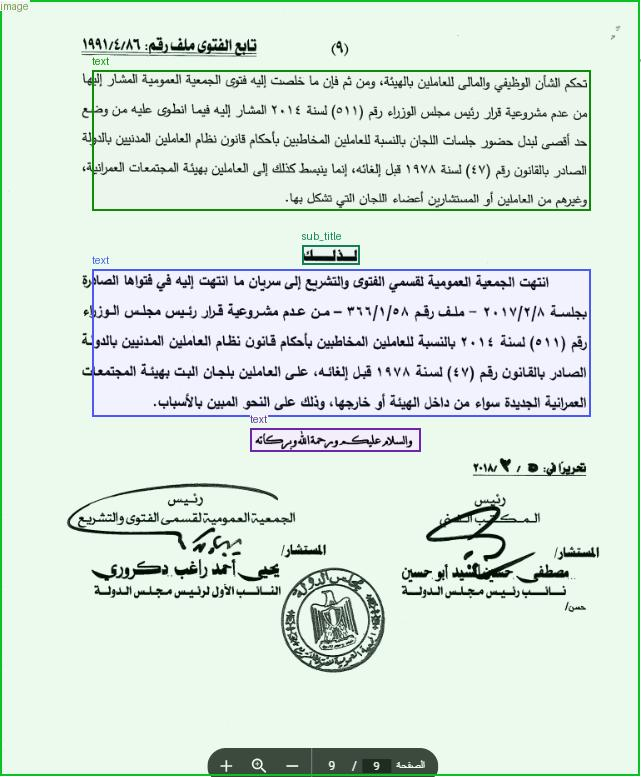

In [23]:
Image("result_with_boxes.jpg", width=640)

In [20]:
res.

AttributeError: 'NoneType' object has no attribute 'addict'

<div style="
background: linear-gradient(135deg, #e8f5e9, #f1f8e9);
border: 2px solid #4CAF50;
border-radius: 14px;
padding: 18px;
text-align: center;
color: #1b5e20;
font-family: 'Segoe UI', sans-serif;
font-size: 1.1em;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
">

<b>📘 Vision Class — Deep Learning & Computer Vision</b><br><br>

🔗 <a href="https://class.vision" target="_blank" style="color:#1b5e20; font-weight:600;">
https://class.vision</a><br><br>

📣 Telegram Channels:<br>
<a href="https://t.me/cvision" target="_blank" style="color:#2e7d32; font-weight:bold;">@cvision</a> |
<a href="https://t.me/class_vision" target="_blank" style="color:#2e7d32; font-weight:bold;">@class_vision</a> |
<a href="https://t.me/llm_huggingface" target="_blank" style="color:#2e7d32; font-weight:bold">@llm_huggingface</a>

</div>
